In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')

from pipeline.models import wczytanie_materialow, oblicz_alfa, macierz_A

In [4]:
materialy = wczytanie_materialow()
alfa_powietrze = oblicz_alfa('powietrze', 100.0)
nx, ny = 50, 50
szerokosc = 3.0
h = szerokosc / (nx - 1)
T_startowa = 15.0
T_okna = 5.0
T_grzejnika = 40.0

dt = 20.0
kroki = 5000

In [5]:
pokoj_A = np.ones((nx, ny)) * T_startowa
pokoj_A[0, 15:35] = T_okna
pokoj_A[1:5, 20:30] = T_grzejnika

u_pokoj_A = pokoj_A.flatten()
maska_A = (u_pokoj_A != 15.0)
A_inv_pokoj_A = macierz_A(nx, ny, alfa_powietrze, dt, h, maska_A)

for i in range(kroki):
    u_pokoj_A = A_inv_pokoj_A @ u_pokoj_A

wynik_A = u_pokoj_A.reshape((nx, ny))

In [6]:
pokoj_B = np.ones((nx, ny)) * T_startowa
pokoj_B[0, 15:35] = T_okna
pokoj_B[-5:-1, 20:30] = T_grzejnika

u_pokoj_B = pokoj_B.flatten()
maska_B = (u_pokoj_B != 15.0)
A_inv_pokoj_B = macierz_A(nx, ny, alfa_powietrze, dt, h, maska_B)

for i in range(kroki):
    u_pokoj_B = A_inv_pokoj_B @ u_pokoj_B 

wynik_B = u_pokoj_B.reshape((nx, ny))

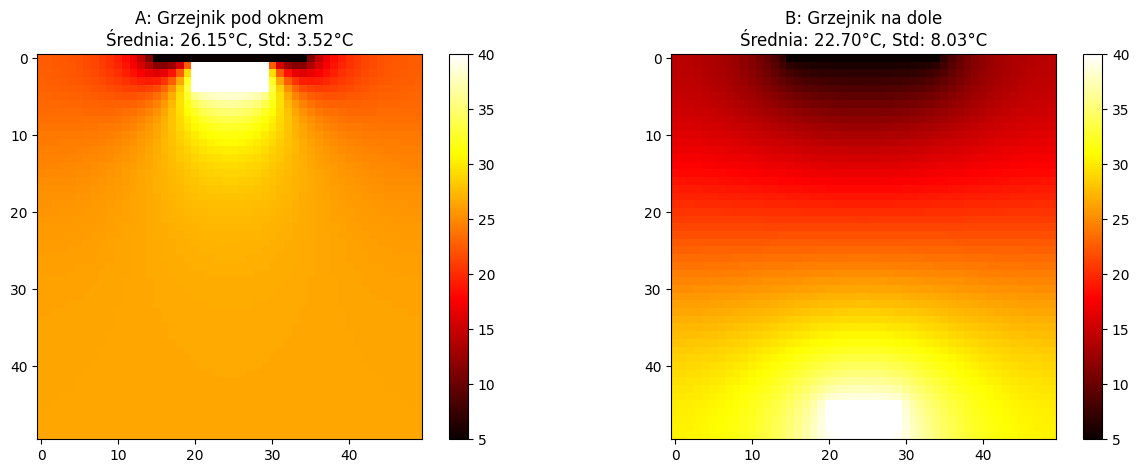

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

im1 = ax[0].imshow(wynik_A, cmap='hot')
ax[0].set_title(f"A: Grzejnik pod oknem\nŚrednia: {np.mean(wynik_A):.2f}°C, Std: {np.std(wynik_A):.2f}°C")
plt.colorbar(im1, ax=ax[0])

im2 = ax[1].imshow(wynik_B, cmap='hot')
ax[1].set_title(f"B: Grzejnik na dole\nŚrednia: {np.mean(wynik_B):.2f}°C, Std: {np.std(wynik_B):.2f}°C")
plt.colorbar(im2, ax=ax[1])

plt.show()